In [5]:
from keras.datasets import fashion_mnist

In [8]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
print(train_X.shape)
print(test_X.shape)
input_dim = 28 * 28

(60000, 28, 28)
(10000, 28, 28)


In [11]:
train_X = train_X.reshape(60000, input_dim)
test_X = test_X.reshape(10000, input_dim)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X /= 255 # pixel 값이 0 ~ 255 까지 있기 때문
test_X /= 255

In [12]:
output_dim = nb_classes = 10

In [14]:
train_Y = np_utils.to_categorical(train_y, nb_classes)
test_Y = np_utils.to_categorical(test_y, nb_classes)

In [18]:
print(test_y[0])
print(test_Y[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [19]:
model = Sequential()

In [20]:
# hidden layer 가 없으면 LR
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [21]:
batch_size = 128
nb_epoch = 100

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [24]:
# model training
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_Y, batch_size=batch_size, nb_epoch=nb_epoch, validation_data=(test_X, test_Y))
score = model.evaluate(test_X, test_Y, verbose=0)

c:\users\visitor.slsi\desktop\ml\mlenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 16us/step - loss: 1.1690 - accuracy: 0.6417 - val_loss: 0.8686 - val_accuracy: 0.7181
Epoch 2/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.7816 - accuracy: 0.7514 - val_loss: 0.7448 - val_accuracy: 0.7548
Epoch 3/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.6958 - accuracy: 0.7777 - val_loss: 0.6876 - val_accuracy: 0.7730
Epoch 4/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.6492 - accuracy: 0.7926 - val_loss: 0.6526 - val_accuracy: 0.7849
Epoch 5/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.6185 - accuracy: 0.8009 - val_loss: 0.6278 - val_accuracy: 0.7916
Epoch 6/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.5960 - accuracy: 0.8073 - val_loss: 0.6082 - val_accuracy: 0.7984
Epoch 7/100
60000/60000 [==============================] - 1s 

Epoch 56/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.4366 - accuracy: 0.8517 - val_loss: 0.4728 - val_accuracy: 0.8350
Epoch 57/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.4360 - accuracy: 0.8522 - val_loss: 0.4722 - val_accuracy: 0.8348
Epoch 58/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.4354 - accuracy: 0.8527 - val_loss: 0.4711 - val_accuracy: 0.8356
Epoch 59/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.4346 - accuracy: 0.8530 - val_loss: 0.4705 - val_accuracy: 0.8357
Epoch 60/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.4339 - accuracy: 0.8530 - val_loss: 0.4700 - val_accuracy: 0.8359
Epoch 61/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.4332 - accuracy: 0.8526 - val_loss: 0.4701 - val_accuracy: 0.8350
Epoch 62/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.4327 - accuracy: 0.8536

In [26]:
score

[0.4560398384094238, 0.8396999835968018]

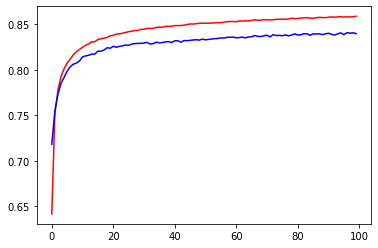

In [36]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.show()

In [37]:
import numpy as np

In [38]:
index = 0
misclassifiedIndexes = []
predictions = model.predict_classes(test_X)
for label, predict in zip(test_y, predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index += 1

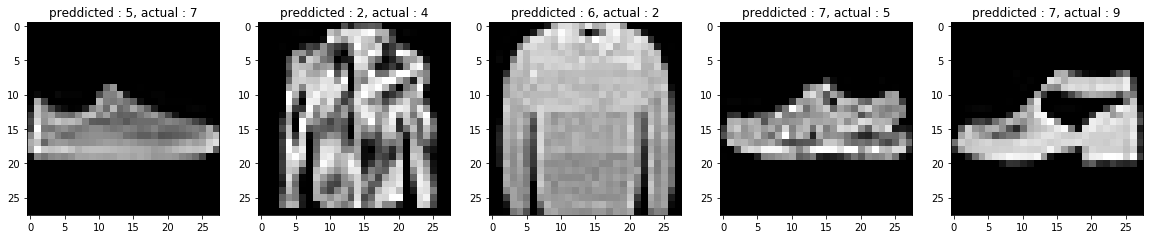

In [40]:
plt.figure(figsize=(20, 4))
for pi, bi in enumerate(misclassifiedIndexes[:5]):
    plt.subplot(1, 5, pi + 1)
    plt.imshow(np.reshape(test_X[bi], (28, 28)), cmap=plt.cm.gray)
    plt.title(f"preddicted : {predictions[bi]}, actual : {test_y[bi]}")